In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/womens-shoes-prices/Datafiniti_Womens_Shoes.csv
/kaggle/input/womens-shoes-prices/Datafiniti_Womens_Shoes_Jun19.csv
/kaggle/input/womens-shoes-prices/7210_1.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

<h2>About This Data</h2>
This is a list of 10,000 women's shoes and their product information provided by Datafiniti's Product Database.

The dataset includes shoe name, brand, price, and more. Each shoe will have an entry for each price found for it and some shoes may have multiple entries.

* asins - The ASIN (Amazon identifier) used for this product.
* brand - The brand name of this product.
* categories - A list of category keywords used for this product across multiple sources.
* colors - A list of colors available for this product.
* count - The number of units included in the product packaging. Can include a description of the unit.
* prices - A list of prices for this product.
* * Price objects may contain:
* * * amountMin: The minimum price value listed.
* * * amountMax: The maximum price value listed. This is typically the same as amountMin, except in cases where a price range is listed.
* * * availability: A true or false if this product is available at this price.
* * * color: The color associated with this price.
* * * condition: The condition of the product when being sold at this price.
* * * count: The number of units being sold at this price.
* * * currency: The currency listed for amountMin and amountMax.
* * * dateSeen: A list of dates when this price was seen.
* * * flavor: The flavor associated with this price.
* * * isSale: A true/false for whether or not this price is a sale/discounted price.
* * * isSold: A true/flase for whether or not the product has been sold at this price (typically reserved for vehicle listings).
* * * merchant: The merchant and/or website selling at this price.
* * * offer: Any special offer associated with this price.
* * * returnPolicy: The return policy associated with this price.
* * * shipping: The shipping terms associated with this price.
* * * size: The size associated with this price.
* * * sourceURLs: A list of URLs where this price was seen.
* * * warranty: The warranty associated with this price.

In [3]:
data = pd.read_csv("/kaggle/input/womens-shoes-prices/7210_1.csv")
print(data.shape)
print(data.columns)
data.head()

(33801, 52)
Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateAdded',
       'dateUpdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageURLs', 'isbn', 'keys', 'manufacturer',
       'manufacturerNumber', 'merchants', 'name', 'prices.amountMin',
       'prices.amountMax', 'prices.availability', 'prices.color',
       'prices.condition', 'prices.count', 'prices.currency',
       'prices.dateAdded', 'prices.dateSeen', 'prices.flavor', 'prices.isSale',
       'prices.merchant', 'prices.offer', 'prices.returnPolicy',
       'prices.shipping', 'prices.size', 'prices.source', 'prices.sourceURLs',
       'prices.warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceURLs', 'upc', 'vin', 'websiteIDs', 'weight', 'Unnamed: 48',
       'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51'],
      dtype='object')


/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (13,16,18,22,24,32,33,40,41,47,51) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,asins,brand,categories,colors,count,dateAdded,dateUpdated,descriptions,dimension,...,skus,sourceURLs,upc,vin,websiteIDs,weight,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
0,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,...,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,...,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,...,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,...,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,...,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data['prices.currency'].value_counts()

USD    32680
CAD     1008
EUR      101
AUD       11
GBP        1
Name: prices.currency, dtype: int64

As we can see, there are several currencies in dataset. Let's bring prices to a single currency (USD, for example)

In [5]:
def curr_processing(x):
    if x.currency == 'AUD':
        x.price = x.price * 0.75
    if x.currency == 'CAD':
        x.price = x.price * 0.73
    if x.currency == 'EUR':
        x.price = x.price * 1.1
    return x

Creating new DataFrame with most interesting columns

In [6]:
processed_data = data[['id', 'asins', 'brand', 'prices.amountMax', 'prices.currency', 'categories', 'colors', 'imageURLs']].rename(columns={'prices.amountMax':'price', 'prices.currency':'currency'})
processed_data = processed_data.apply(curr_processing, axis = 1)
processed_data = processed_data.sort_values('price', ascending=False)
processed_data.head()

,id,asins,brand,price,currency,categories,colors,imageURLs
374,AVpe_UGuLJeJML43z6kG,B000EIXDWK,NaN,5720.00,EUR,"Shoes,Women's Shoes,Sandals","Tan,Green,Graphite,Navy",http://ecx.images-amazon.com/images/I/41Rm9K4F...
1030,AVpe5ybYLJeJML43x6hZ,B00A1TJT5W,NaN,4697.00,EUR,"Shoes,Women's Shoes","Khaki,Blue",http://ecx.images-amazon.com/images/I/41NNAcmf...
21220,AVphQOzn1cnluZ0-AQNk,B00Z8E4O8M,JewelsObsession,4198.99,USD,"Fine,Women,Clothing, Shoes & Jewelry,Jewelry",NaN,http://ecx.images-amazon.com/images/I/31Ndh8nw...
21219,AVphQOzn1cnluZ0-AQNk,B00Z8E4O8M,JewelsObsession,4198.99,USD,"Fine,Women,Clothing, Shoes & Jewelry,Jewelry",NaN,http://ecx.images-amazon.com/images/I/31Ndh8nw...
5294,AVpfCXPOLJeJML430_2e,B0055X2U3W,Teva,3848.90,EUR,"shoes,Women,Athletic",NaN,http://ecx.images-amazon.com/images/I/41cBPaIu...


Let's see most expensive brand and mean values for their shoes

In [7]:
# top 10 most expensive brands
brand_mean_prices = processed_data[['brand', 'price']].groupby(by=['brand'], as_index = False).mean()
brand_mean_prices.sort_values('price', ascending=False).head(10)

,brand,price
643,JewelsObsession,3322.190000
1197,Teva,1485.538000
1274,Valentino,1186.998000
1107,Simone Rocha,1120.000000
768,MALONE SOULIERS,1100.000000
894,Nicholas Kirkwood,1095.000000
806,Marni,963.333333
959,Paul Andrew,895.000000
1146,Stella McCartney,885.000000
277,Christian Louboutin,867.333333


Text(0.5, 1.0, 'Price distribution')

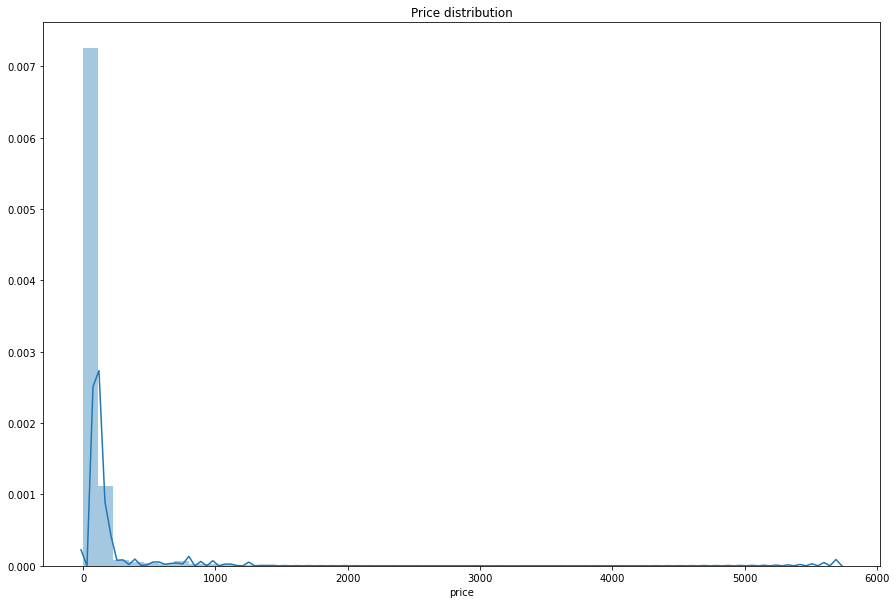

In [8]:
f, ax = plt.subplots(figsize=(15,10))
sns.distplot(processed_data['price'], ax=ax).set_title('Price distribution')

We can see some shoes with price between 5000 and 600. It looks like outlier, so let's see examples of shoes at this price 

In [9]:
from PIL import Image
import requests
from io import BytesIO

def show_image(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return img

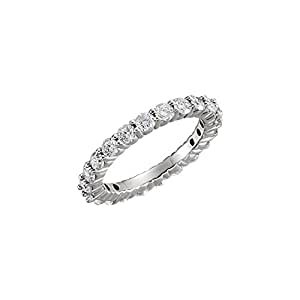

In [10]:
top_1_brand_name = brand_mean_prices.sort_values('price', ascending=False).head(10)['brand'].to_numpy()[0]
show_image(processed_data[processed_data['brand'] == top_1_brand_name]['imageURLs'].to_numpy()[0].split(",")[0])

It seems that the dataset has received some erroneous data that is not related to shoes. As we see, for example, jewelry. This could be due to the fact that during data collection, all data that has the word 'shoes'in the category name was collected. But for some products, the category contains all the products that this brand produces. For this reason, we will exclude all products that contain Jewelry in the description

In [11]:
processed_data[processed_data['brand'] == top_1_brand_name]

,id,asins,brand,price,currency,categories,colors,imageURLs
21220,AVphQOzn1cnluZ0-AQNk,B00Z8E4O8M,JewelsObsession,4198.99,USD,"Fine,Women,Clothing, Shoes & Jewelry,Jewelry",NaN,http://ecx.images-amazon.com/images/I/31Ndh8nw...
21219,AVphQOzn1cnluZ0-AQNk,B00Z8E4O8M,JewelsObsession,4198.99,USD,"Fine,Women,Clothing, Shoes & Jewelry,Jewelry",NaN,http://ecx.images-amazon.com/images/I/31Ndh8nw...
21222,AVphQOzn1cnluZ0-AQNk,B00Z8E4O8M,JewelsObsession,3109.99,USD,"Fine,Women,Clothing, Shoes & Jewelry,Jewelry",NaN,http://ecx.images-amazon.com/images/I/31Ndh8nw...
21221,AVphQOzn1cnluZ0-AQNk,B00Z8E4O8M,JewelsObsession,3109.99,USD,"Fine,Women,Clothing, Shoes & Jewelry,Jewelry",NaN,http://ecx.images-amazon.com/images/I/31Ndh8nw...
21223,AVphQOzn1cnluZ0-AQNk,B00Z8E4O8M,JewelsObsession,1992.99,USD,"Fine,Women,Clothing, Shoes & Jewelry,Jewelry",NaN,http://ecx.images-amazon.com/images/I/31Ndh8nw...


In [12]:
processed_data = processed_data[~processed_data['categories'].str.contains('Jewelry')]
processed_data.head()

,id,asins,brand,price,currency,categories,colors,imageURLs
374,AVpe_UGuLJeJML43z6kG,B000EIXDWK,NaN,5720.0,EUR,"Shoes,Women's Shoes,Sandals","Tan,Green,Graphite,Navy",http://ecx.images-amazon.com/images/I/41Rm9K4F...
1030,AVpe5ybYLJeJML43x6hZ,B00A1TJT5W,NaN,4697.0,EUR,"Shoes,Women's Shoes","Khaki,Blue",http://ecx.images-amazon.com/images/I/41NNAcmf...
5294,AVpfCXPOLJeJML430_2e,B0055X2U3W,Teva,3848.9,EUR,"shoes,Women,Athletic",NaN,http://ecx.images-amazon.com/images/I/41cBPaIu...
5295,AVpfCXPOLJeJML430_2e,B0055X2U3W,Teva,3298.9,EUR,"shoes,Women,Athletic",NaN,http://ecx.images-amazon.com/images/I/41cBPaIu...
12990,AVpfU1ca1cnluZ0-ip7w,B002COI2IO,NaN,2963.4,EUR,"Shoes,Baby Shoes,Baby Girls,Women","Hot Pink,Grey,BlackPatent",https://images-na.ssl-images-amazon.com/images...


Also, we exclude goods more expensive than 1000 usd, because in this dataset they are rather outliers and do not reflect the General price trend in the Shoe market

In [13]:
processed_data[processed_data['price'] > 1000]

,id,asins,brand,price,currency,categories,colors,imageURLs
374,AVpe_UGuLJeJML43z6kG,B000EIXDWK,NaN,5720.0,EUR,"Shoes,Women's Shoes,Sandals","Tan,Green,Graphite,Navy",http://ecx.images-amazon.com/images/I/41Rm9K4F...
1030,AVpe5ybYLJeJML43x6hZ,B00A1TJT5W,NaN,4697.0,EUR,"Shoes,Women's Shoes","Khaki,Blue",http://ecx.images-amazon.com/images/I/41NNAcmf...
5294,AVpfCXPOLJeJML430_2e,B0055X2U3W,Teva,3848.9,EUR,"shoes,Women,Athletic",NaN,http://ecx.images-amazon.com/images/I/41cBPaIu...
5295,AVpfCXPOLJeJML430_2e,B0055X2U3W,Teva,3298.9,EUR,"shoes,Women,Athletic",NaN,http://ecx.images-amazon.com/images/I/41cBPaIu...
12990,AVpfU1ca1cnluZ0-ip7w,B002COI2IO,NaN,2963.4,EUR,"Shoes,Baby Shoes,Baby Girls,Women","Hot Pink,Grey,BlackPatent",https://images-na.ssl-images-amazon.com/images...
...,...,...,...,...,...,...,...,...
7733,AVpfIAxs1cnluZ0-ecTA,NaN,Saint Laurent,1095.0,USD,"Women,Shoes,Sandals,Platform",NaN,NaN
16378,AVpgEZ3T1cnluZ0-v90R,NaN,Nicholas Kirkwood,1095.0,USD,"Women,Designer Collections,Designer Shoes,Sandals",NaN,NaN
21464,AVphu6IY1cnluZ0-FyLE,NaN,Burberry,1095.0,USD,"Women,Contemporary,Shoes",NaN,NaN
272,AVpe_iMBilAPnD_xSjo9,NaN,Christian Louboutin,1095.0,USD,"Women,Designer Collections,Designer Shoes,Sandals",NaN,NaN


In [14]:
processed_data = processed_data[processed_data['price'] < 1000]

Also, for some shoes, the price is set at 0.99 usd. This looks more like a data collection error. Let's look at an example of such data

In [15]:
processed_data.tail(5)

,id,asins,brand,price,currency,categories,colors,imageURLs
5162,AVpfCMKWLJeJML4308Cq,NaN,Easy Street,0.99,USD,"Shoes,Clothing,Women's Shoes,All Women's Shoes",Black,https://i5.walmartimages.com/asr/539e15d2-2ec6...
3350,AVpf3vK8LJeJML43FOVd,NaN,Nina,0.99,USD,Women's Shoes,Silver,http://i.ebayimg.com/images/g/898AAOSw0UdXqWN6...
13757,AVpfWeRC1cnluZ0-jLdd,NaN,Kenneth Cole Reaction,0.99,USD,"Women's Shoes,See more Kenneth Cole Reactio Sl...",Black,http://i.ebayimg.com/images/g/TIAAAOSw65FXqZNe...
4508,AVpfavZKilAPnD_xbbIN,NaN,Bella Vita,0.99,USD,Women's Shoes,White,http://i.ebayimg.com/images/g/UuQAAOSw34FVDlVe...
9760,AVpfMlq9ilAPnD_xW_wk,NaN,GUESS,0.01,USD,"Women's Shoes,Boots",Bronze Multi,http://i.ebayimg.com/images/g/UD4AAOSwBLlVUqCI...


In [16]:
data.iloc[5162]

id                                                  AVpfCMKWLJeJML4308Cq
asins                                                                NaN
brand                                                        Easy Street
categories                Shoes,Clothing,Women's Shoes,All Women's Shoes
colors                                                             Black
count                                                                NaN
dateAdded                                           2016-06-11T07:05:20Z
dateUpdated                                         2017-01-09T20:24:22Z
descriptions           [{"dateSeen":["2016-08-06T17:04:50Z"],"sourceU...
dimension                                                            NaN
ean                                                          8.85661e+11
features               [{"key":"Heel Height","value":["Med (1 3/4 in....
flavors                                                              NaN
imageURLs              https://i5.walmartimages.com

Judging by the value of the 'prices.offer' column, the real price of this Shoe is really much more expensive than 0.99. For simplicity, I will simply remove all shoes whose specified price is < 10

In [17]:
processed_data = processed_data[processed_data['price'] > 10]

Text(0.5, 1.0, 'Price distribution')

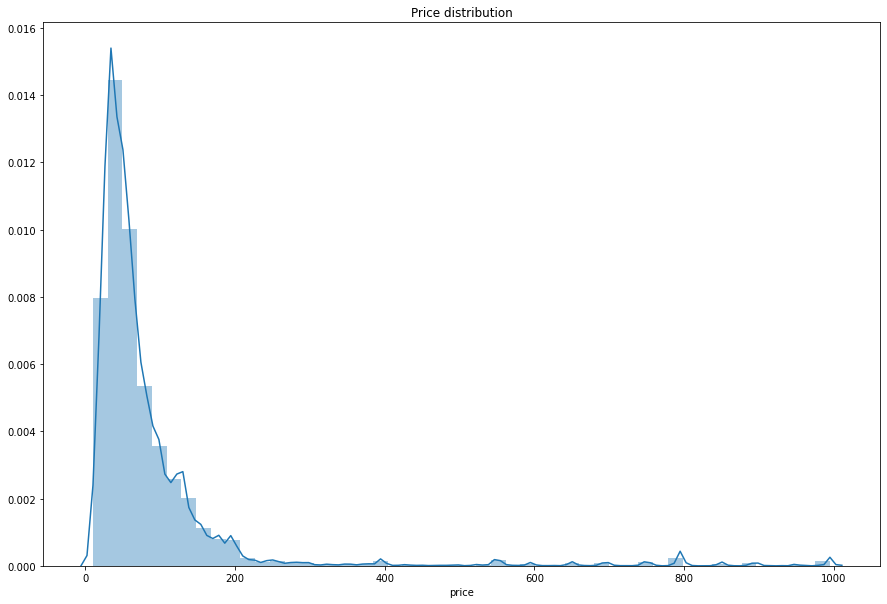

In [18]:
f, ax = plt.subplots(figsize=(15,10))
sns.distplot(processed_data['price'], ax=ax).set_title('Price distribution')

Now let's take a look at the most represented brands on the market, and their price distributions

Text(0.5, 1.0, 'Brands representation')

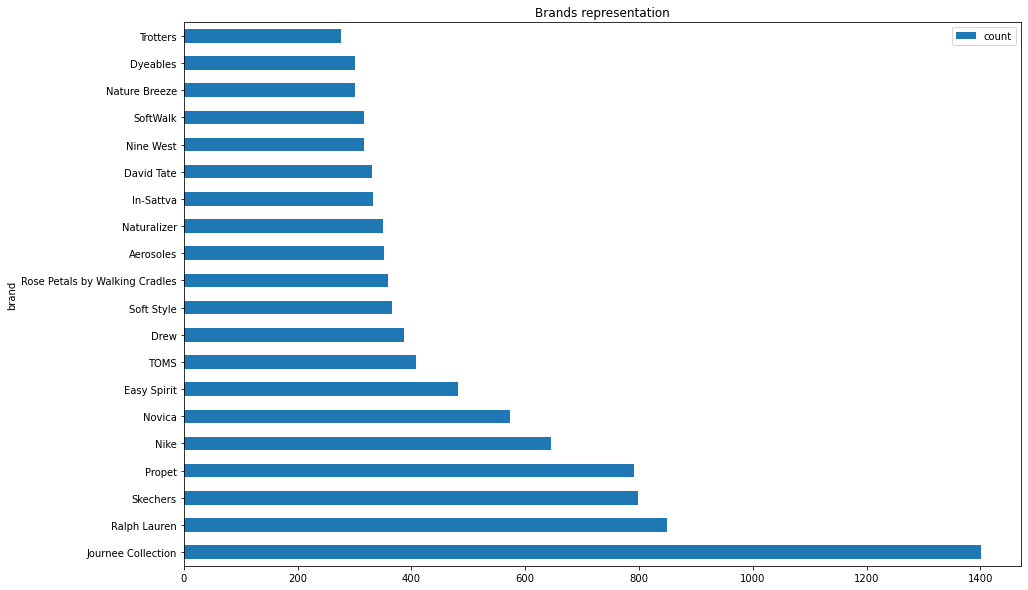

In [19]:
# top 10 most represented brands
brand_counts = processed_data[['brand', 'id']].groupby(by=['brand'], as_index = False).count().rename(columns={'id': 'count'})
brand_counts.sort_values('count', ascending=False).head(20).plot.barh(y = 'count', x = 'brand', figsize=(15,10)).set_title("Brands representation")

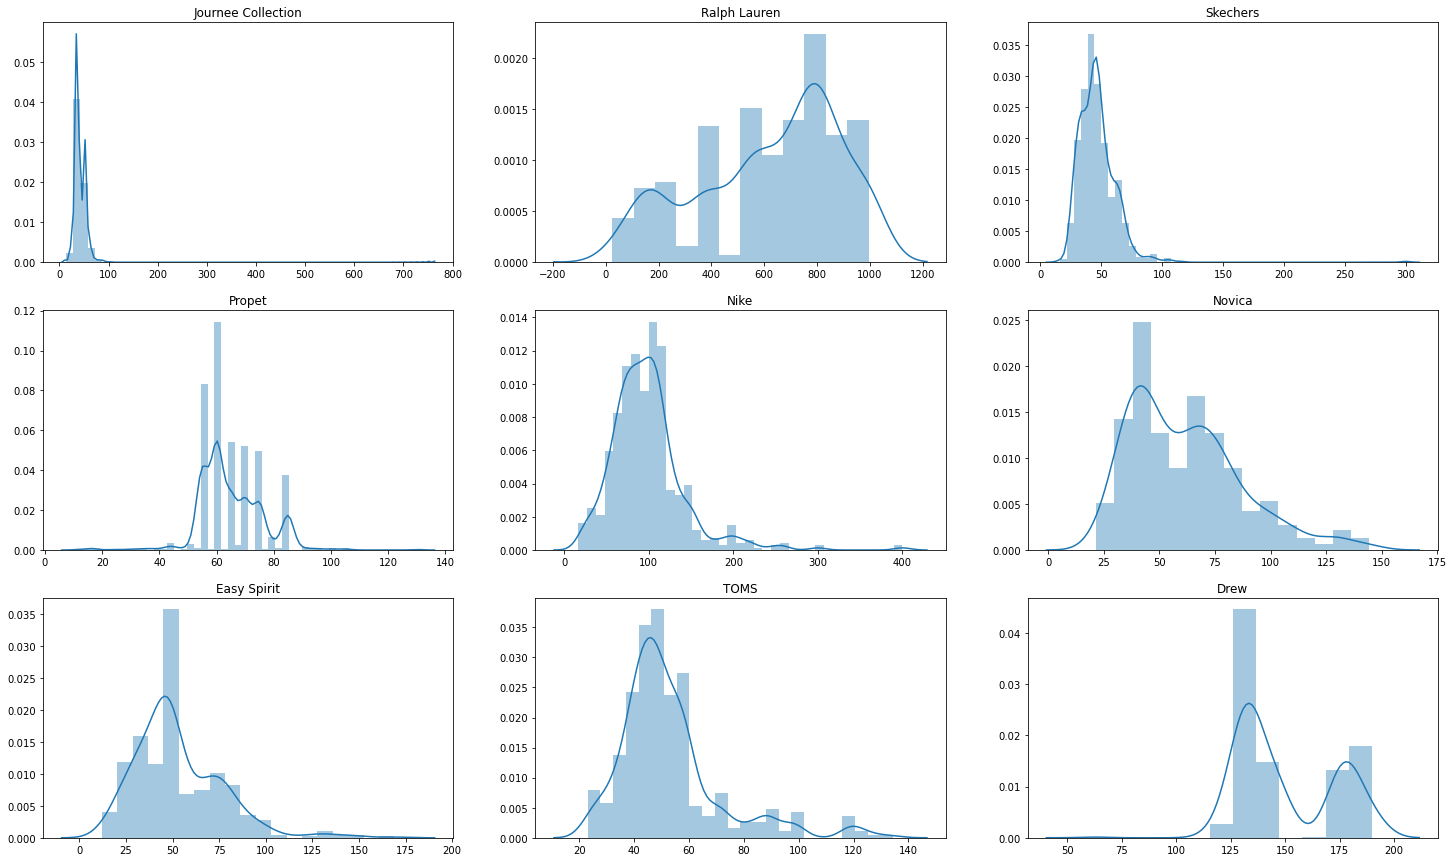

In [25]:
fig, axs = plt.subplots(nrows = 3, ncols=3, figsize = (25,15))
r = 0
c = 0
for brand_name in brand_counts.sort_values('count', ascending=False).head(9)['brand']:
    prices = processed_data[processed_data['brand'] == brand_name]['price'].to_numpy()
    sns.distplot(prices, ax = axs[r][c]).set_title(brand_name)
    c += 1
    if c == 3:
        c = 0
        r += 1

From the above information we can conclude that:
* different brands have different mode metrics of price distribution
* some brands, for example Ralp Lauren, has more than one price distribution peaks, which suggests that they produce lines of shoes in different price ranges